In [2]:
import sys

import matplotlib.pyplot as plt

sys.path.append("/data/renhaoye/MorCG_DECaLS/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/astre_utils/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/astre_utils/catalog/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/astre_utils/img/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/data/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/for_me/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/models/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/utils/")
sys.path.append("/data/renhaoye/MorCG_DECaLS/training/")

In [3]:
from astre_utils.catalog.match import match
from data.utils import load_dir
import numpy as np
from astropy.io import fits
import pandas as pd
from sklearn.model_selection import train_test_split
from utils.label_metadata import *
from utils.schemas import *
import os

In [3]:
"""local files in DECaLS"""
df_in_decals = load_dir("/data/renhaoye/MorCG/dataset/in_decals/raw_fits/")
"""local files in BASS+MzLS"""
df_out_decals = load_dir("/data/renhaoye/MorCG/dataset/out_decals/scaled/")
"""main galaxy sample"""
with fits.open("/data/renhaoye/MorCG/dataset/VAGC_MGS-m14_1777--20180116.fits") as hdul:
    ra = np.array(hdul[1].data["RA      "])
    dec = np.array(hdul[1].data["DEC     "])
    petro_mag = np.array(hdul[1].data["PETROMAG"][:, 2])
    model_mag = np.array(hdul[1].data["MODELMAG"][:, 2])
    fiber_mag = np.array(hdul[1].data["FIBERMAG"][:, 2])
    kcorrect = np.array(hdul[1].data["KCORRECT"][:, 2])
    z = np.array(hdul[1].data["Z"])
    zflag = np.array(hdul[1].data["ZFLAG"])
    MGS = pd.DataFrame(np.array((ra, dec, petro_mag, model_mag, fiber_mag, kcorrect, z, zflag)).T, columns=["ra", "dec", "petro_mag", "model_mag", "fiber_mag", "kcorrect", "z", "zflag"])
# """overlap of DECaLS and BASS+MzLS"""
# overlap = match(df_in_decals, df_out_decals, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
df_c = pd.read_csv("/data/renhaoye/MorCG/dataset/gz_decals_volunteers_c.csv", index_col=0).rename(columns=lambda x: x.replace("-", "_")).fillna(0)

In [5]:
hdul = fits.open("/data/renhaoye/MorCG/dataset/VAGC_MGS-m14_1777--20180116.fits")
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  200 / length of dimension 1                          
NAXIS2  =               746950 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'VID     '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'DEC     '        

In [9]:
out_path = "/data/renhaoye/MorCG/dataset/out_decals/scaled/"
with open("/data/renhaoye/MorCG_DECaLS/dataset/out_decals.txt", "w") as w:
    for i in range(len(df_out_decals)):
        ra = df_out_decals.iloc[i, 0]
        dec = df_out_decals.iloc[i, 1]
        # print(out_path + str(ra) +"_"+str(dec)+".fits")
        if os.path.exists(out_path + str(ra) +"_"+str(dec)+".fits"):
            w.writelines(out_path + str(ra) +"_"+str(dec)+".fits\n")

In [4]:
df_out_decals

,ra,dec
0,156.404678,32.128263
1,148.422728,46.050863
2,171.393300,40.511548
3,174.082308,34.291213
4,138.421896,37.178474
...,...,...
259318,192.953495,44.714637
259319,221.380369,34.762659
259320,160.264028,57.092322
259321,192.880675,63.491155


In [17]:
hdul = fits.open("/data/renhaoye/MorCG/dataset/VAGC_MGS-m14_1777--20180116.fits")
hdul[1].data["ZFLAG"]

array([1., 3., 1., ..., 1., 1., 1.])

In [19]:
mgs_out_decals = match(df_out_decals[["ra", "dec"]], MGS, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})

In [6]:
len(mgs_out_decals)

259323

In [20]:
mgs_out_decals

,ra,dec,petro_mag,model_mag,fiber_mag,kcorrect,z,zflag
0,156.404678,32.128263,15.143953,15.016191,16.695520,-0.176257,0.037345,1.0
1,148.422728,46.050863,17.371208,17.362738,18.940884,-0.075653,0.127883,1.0
2,171.393300,40.511548,17.281286,17.296396,18.777445,-0.094603,0.122104,1.0
3,174.082308,34.291213,17.538813,17.229443,18.860756,-0.029741,0.240013,1.0
4,138.421896,37.178474,17.671869,17.643246,18.793917,-0.102097,0.104790,1.0
...,...,...,...,...,...,...,...,...
259318,192.953495,44.714637,17.462763,17.356127,18.415308,-0.118210,0.086586,1.0
259319,221.380369,34.762659,17.251778,17.195953,19.037485,-0.127115,0.077640,1.0
259320,160.264028,57.092322,17.500916,17.437056,18.287146,-0.125338,0.080563,1.0
259321,192.880675,63.491155,16.362547,16.346455,16.894310,0.000000,0.000000,0.0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
len(mgs_out_decals.query("z > 0.01 and z < 0.4"))

244771

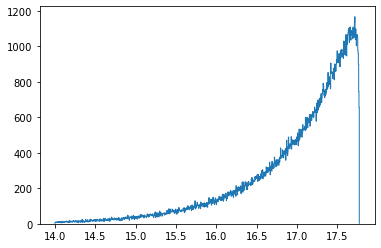

In [32]:
plt.hist(mgs_out_decals.petro_mag, bins=1000, histtype="step")
# plt.xlim((0.01, 0.4))
plt.show()

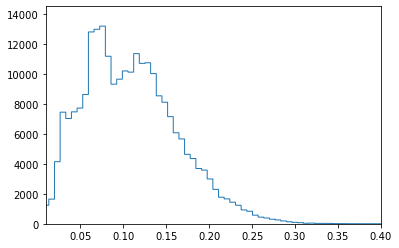

In [30]:
plt.hist(mgs_out_decals.z, bins=1000, histtype="step")
plt.xlim((0.01, 0.4))
plt.show()

In [4]:
def get_each_question(df_c, votes):
    return df_c.query("smooth_or_featured_total_votes >= %d" % votes),\
           df_c.query("disk_edge_on_total_votes >= %d" % votes),\
           df_c.query("has_spiral_arms_total_votes >= %d" % votes),\
           df_c.query("bar_total_votes >= %d" % votes),\
           df_c.query("bulge_size_total_votes >= %d" % votes),\
           df_c.query("how_rounded_total_votes >= %d" % votes),\
           df_c.query("edge_on_bulge_total_votes >= %d" % votes),\
           df_c.query("spiral_winding_total_votes >= %d" % votes),\
           df_c.query("spiral_arm_count_total_votes >= %d" % votes),\
           df_c.query("merging_total_votes >= %d" % votes)
def get_total_question(df, votes, operator):
    if operator == ">=":
        return df.query("smooth_or_featured_total_votes >= %d | disk_edge_on_total_votes >= %d | has_spiral_arms_total_votes >= %d | bar_total_votes >= %d | bulge_size_total_votes >= %d | how_rounded_total_votes >= %d | edge_on_bulge_total_votes >= %d | spiral_winding_total_votes >= %d | spiral_arm_count_total_votes >= %d | merging_total_votes >= %d" %(votes, votes, votes, votes, votes, votes, votes, votes, votes, votes))
    if operator == "<=":
        return df.query("smooth_or_featured_total_votes >= 3 | disk_edge_on_total_votes >= 3 | has_spiral_arms_total_votes >= 3 | bar_total_votes >= 3 | bulge_size_total_votes >= 3 | how_rounded_total_votes >= 3 | edge_on_bulge_total_votes >= 3 | spiral_winding_total_votes >= 3 | spiral_arm_count_total_votes >= 3 | merging_total_votes >= 3").query("smooth_or_featured_total_votes <= %d | disk_edge_on_total_votes <= %d | has_spiral_arms_total_votes <= %d | bar_total_votes <= %d | bulge_size_total_votes <= %d | how_rounded_total_votes <= %d | edge_on_bulge_total_votes <= %d | spiral_winding_total_votes <= %d | spiral_arm_count_total_votes <= %d | merging_total_votes <= %d" %(votes, votes, votes, votes, votes, votes, votes, votes, votes, votes))

In [5]:
in_decals = match(df_in_decals, df_c, 2, ["real_ra", "real_dec"]).drop(columns=["ra", "dec"]).rename(columns={"real_ra":"ra", "real_dec":"dec"})
out_decals = match(df_out_decals, df_c, 2, ["real_ra", "real_dec"]).drop(columns=["ra", "dec"]).rename(columns={"real_ra":"ra", "real_dec":"dec"})
overlap = match(in_decals[["ra", "dec"]], out_decals, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
only_in_decals = pd.concat([in_decals, out_decals, out_decals]).drop_duplicates(keep=False)
only_out_decals = pd.concat([out_decals, in_decals, in_decals]).drop_duplicates(keep=False)
len(in_decals), len(out_decals), len(overlap), len(only_in_decals), len(only_out_decals)

(140931, 3713, 3618, 137313, 95)

In [11]:
overlap.to_csv("/data/renhaoye/MorCG_DECaLS/dataset/overlap.csv")

,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,active_learning_on,...,spiral_arm_count_cant_tell_fraction,merging_total_votes,merging_none,merging_none_fraction,merging_minor_disturbance,merging_minor_disturbance_fraction,merging_major_disturbance,merging_major_disturbance_fraction,merging_merger,merging_merger_fraction
0,156.404678,32.128263,0.037345,-20.225850,1243.062400,3.405226,11.521922,7.807667,active_baseline,False,...,0.0000,4,4,1.000000,0,0.000000,0,0.000000,0,0.000000
1,353.134865,0.648646,0.065196,-19.588432,151.364820,2.929065,6.465595,5.842183,active_baseline,False,...,0.5000,6,5,0.833333,1,0.166667,0,0.000000,0,0.000000
2,37.034101,0.054160,0.062150,-20.116978,278.596560,3.923811,9.933681,8.390046,pre_active,False,...,0.3125,37,6,0.162162,16,0.432432,6,0.162162,3,0.081081
3,41.180459,1.222984,0.071949,-19.227112,96.110344,1.578830,4.394024,3.639873,pre_active,False,...,0.0000,34,20,0.588235,5,0.147059,2,0.058824,0,0.000000
4,168.303649,31.972414,0.118092,-20.502115,89.214455,1.731566,5.273066,3.781496,active_baseline,False,...,0.0000,4,4,1.000000,0,0.000000,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,38.324794,-1.246896,0.050361,-18.379513,83.085700,4.394024,10.682637,10.377614,pre_active,False,...,0.0000,38,36,0.947368,1,0.026316,1,0.026316,0,0.000000
3614,170.880584,32.458464,0.075255,-21.369747,887.079160,3.385794,11.456174,7.587428,active_baseline,False,...,0.0000,4,2,0.500000,2,0.500000,0,0.000000,0,0.000000
3615,39.218964,-0.955296,0.112789,-20.233921,93.505830,1.333357,3.970353,3.015157,active_baseline,False,...,0.0000,4,4,1.000000,0,0.000000,0,0.000000,0,0.000000
3616,227.203124,32.863581,0.112732,-20.884190,172.655530,1.526362,4.746917,3.385585,active_baseline,False,...,0.0000,8,3,0.375000,3,0.375000,0,0.000000,2,0.250000


In [6]:
acc = get_total_question(in_decals, 34, ">=")

In [ ]:
acc

In [12]:
only_in_decals_data = get_total_question(only_in_decals, 3, ">=")
len(only_in_decals_data), len(overlap)/len(only_in_decals_data)

(135599, 0.026681612696258822)

In [18]:
train, valid = train_test_split(only_in_decals_data, train_size=0.8266, random_state=1926)
valid = pd.concat([valid, overlap])
len(train), len(valid)

In [35]:
train.to_csv("/data/renhaoye/MorCG_DECaLS/dataset/train.csv")
valid.to_csv("/data/renhaoye/MorCG_DECaLS/dataset/valid.csv")

In [25]:
q1, q2, q3, q4, q5, q6, q7, q8, q9, q10 = get_each_question(valid, 34)
len(q1), len(q2), len(q3), len(q4), len(q5), len(q6), len(q7), len(q8), len(q9), len(q10)

(8058, 1183, 873, 873, 873, 1501, 119, 599, 599, 6763)

In [9]:
question_answer_pairs = gz2_pairs
dependencies = gz2_and_decals_dependencies
schema = Schema(question_answer_pairs, dependencies)
label_cols = schema.label_cols
def get_galaxy_label(galaxy, label_cols):
    # no longer casts to int64, user now responsible in df. If dtype is mixed, will try to infer with infer_objects
    return galaxy[label_cols].infer_objects().values.squeeze()  # squeeze for if there's one label_col

In [34]:
func = ["train", "valid"]
dataset = [train, valid]
# for i in range(1):
for i in range(len(func)):
    with open("/data/renhaoye/MorCG_DECaLS/dataset/mw_%s.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = "/data/renhaoye/MorCG/dataset/in_decals/agmtn/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
                if i == 0:
                    if os.path.exists(path.split(".fits")[0] + "_rotated.fits"):
                        w.write(path.split(".fits")[0] + "_rotated.fits" + " label:")
                        for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                            w.write(str(v) + " ")
                        w.write(" \n")
                    if os.path.exists(path.split(".fits")[0] + "_flipped.fits"):
                        w.write(path.split(".fits")[0] + "_flipped.fits" + " label:")
                        for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                            w.write(str(v) + " ")
                        w.write(" \n")
                    if os.path.exists(path.split(".fits")[0] + "_shifted.fits"):
                        w.write(path.split(".fits")[0] + "_shifted.fits" + " label:")
                        for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                            w.write(str(v) + " ")
                        w.write(" \n")
            else:
                print(path.split(".fits")[0])

In [17]:
overlap_train, overlap_valid = train_test_split(overlap, train_size=0.6, random_state=1926)

In [18]:
func = ["overlap_train", "overlap_valid"]
dataset = [overlap_train, overlap_valid]
# for i in range(1):
for i in range(len(func)):
    with open("/data/renhaoye/MorCG_DECaLS/dataset/mw_%s.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = "/data/renhaoye/MorCG/dataset/out_decals/scaled/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
            else:
                print(path.split(".fits")[0])

In [10]:
func = ["acc"]
dataset = [acc]
# for i in range(1):
for i in range(len(func)):
    with open("/data/renhaoye/MorCG_DECaLS/dataset/mw_%s.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = "/data/renhaoye/MorCG/dataset/in_decals/agmtn/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
            else:
                print(path.split(".fits")[0])